In [1]:
import pandas as pd


In [35]:
dataset = pd.read_csv('processed_datav0.csv')
dataset.describe()

,DTSM,DT,NPHIS,GR,idx,md,DRES,MRES,SRES
count,2.356364e+06,2.173820e+06,1.895692e+06,1.861558e+06,1.699184e+06,1.523130e+06,1.272906e+06,483642.000000,0.0
mean,1.215088e+02,1.951350e+02,2.709815e+02,4.155037e+02,7.345090e+02,4.684573e+02,6.658230e+02,2353.871333,NaN
std,9.070695e+02,1.385254e+03,1.568310e+03,1.778339e+03,2.388085e+03,2.097626e+03,2.707133e+03,3751.980123,NaN
min,-2.136331e+02,-1.660108e+02,-1.462014e+02,-1.606701e+02,-1.623150e+02,-1.249133e+02,-1.240248e+02,-0.184100,NaN
25%,4.253800e+00,1.813000e-01,2.674600e+00,1.418000e-01,2.465800e+00,2.542600e+00,2.511800e+00,42.000000,NaN
50%,1.844585e+01,8.910400e+00,1.180055e+01,8.723600e+00,1.251820e+01,8.431700e+00,4.548085e+01,515.335325,NaN
75%,6.740633e+01,7.702555e+01,8.211947e+01,7.640623e+01,8.679167e+01,8.594010e+01,1.207289e+02,2767.609463,NaN
max,1.017883e+05,9.855346e+04,2.556387e+05,1.016904e+05,2.973448e+05,8.851197e+05,1.248663e+05,63488.472650,NaN


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356364 entries, 0 to 2356363
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   DTSM    float64
 1   DT      float64
 2   NPHIS   float64
 3   GR      float64
 4   idx     float64
 5   md      float64
 6   DRES    float64
 7   MRES    float64
 8   SRES    float64
dtypes: float64(9)
memory usage: 161.8 MB


In [47]:
cols_to_use = ['idx', 'md', 'DTSM', 'DT', 'DRES', 'GR', 'NPHIS']
filtered_dataset = dataset.loc[~dataset['md'].isna() & ~dataset['DT'].isna(), cols_to_use]
filtered_dataset = filtered_dataset.loc[dataset['DT'] < 10000]
filtered_dataset = filtered_dataset.loc[dataset['DT'] > 1]
filtered_dataset = filtered_dataset.loc[dataset['DTSM'] < 10000]
filtered_dataset = filtered_dataset.loc[dataset['DTSM'] > 1]
filtered_dataset = filtered_dataset.loc[dataset['GR'] < 400]
filtered_dataset = filtered_dataset.loc[dataset['GR'] >= 0]
filtered_dataset = filtered_dataset.loc[dataset['DRES'] < 4000]
filtered_dataset = filtered_dataset.loc[dataset['NPHIS'] < 100]
filtered_dataset = filtered_dataset.loc[dataset['NPHIS'] > -0.1]
filtered_dataset.loc[dataset['NPHIS'] > 0.6] = filtered_dataset.loc[dataset['NPHIS'] > 0.6]/100


In [38]:
filtered_dataset.shape[0]
# filtered_dataset.head(10)
sampled_dataset = filtered_dataset.sample(n=10000)

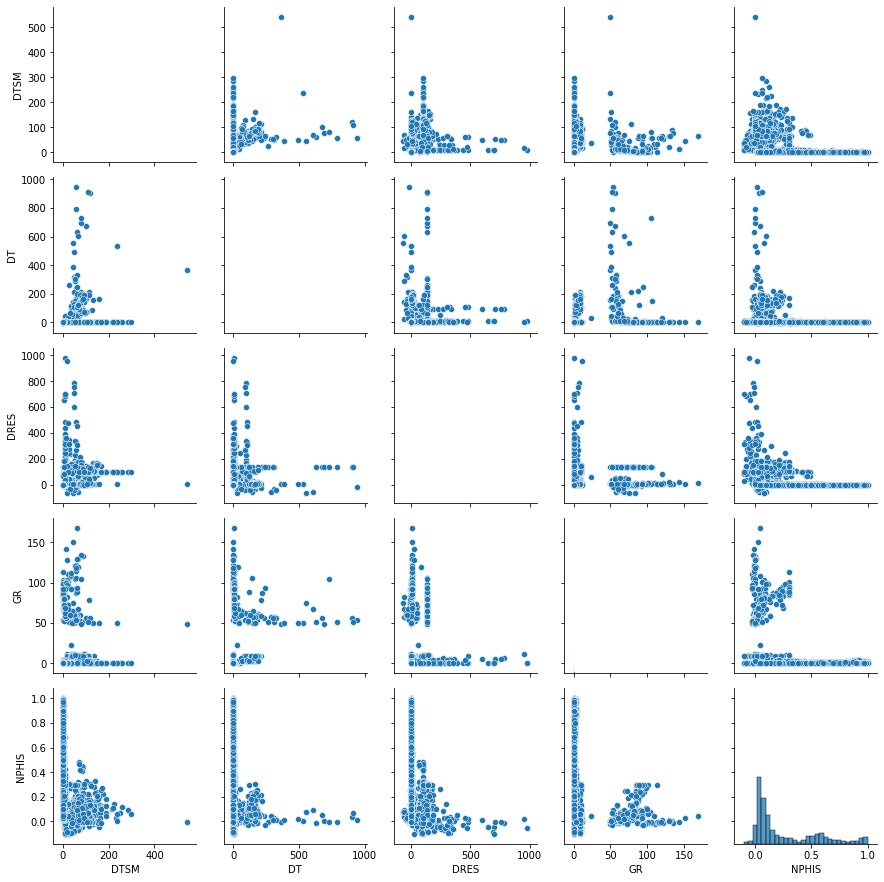

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.PairGrid(sampled_dataset.loc[:, cols_to_use[2:]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
# sns.PairGrid(filtered_dataset.loc[:200000, cols_to_use[2:]])
plt.show()


In [48]:
filtered_dataset['psuedo_dts_ss'] = filtered_dataset['DT'] * 1.6

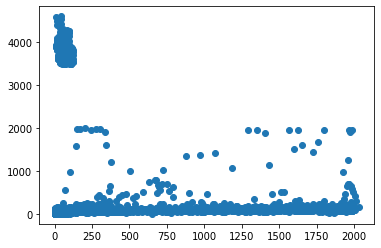

In [49]:
plt.scatter(filtered_dataset['DT'], filtered_dataset['DTSM'])
plt.show()

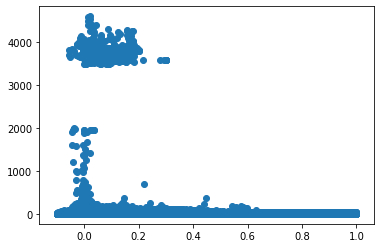

In [50]:
plt.scatter(filtered_dataset['NPHIS'], filtered_dataset['DTSM'])
plt.show()

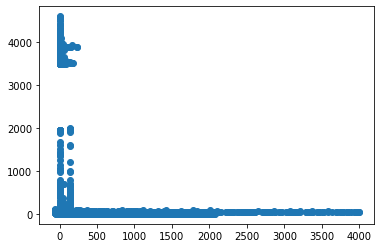

In [51]:
plt.scatter(filtered_dataset['DRES'], filtered_dataset['DTSM'])
plt.show()

In [54]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

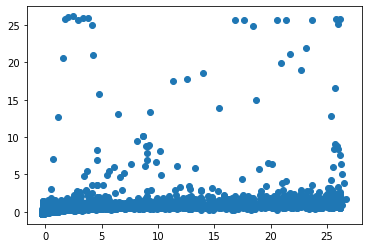

In [64]:
# Split Dataset
features = ['DT',]
training = filtered_dataset.loc[filtered_dataset['idx'] >= 40]
training_y =  filtered_dataset.loc[filtered_dataset['idx'] >= 40, ['DTSM']]
test = filtered_dataset.loc[filtered_dataset['idx'] < 40]
test_y =  filtered_dataset.loc[filtered_dataset['idx'] < 40, ['DTSM']]

training = training[features]
test = test[features]

# Preprocess
scaler = StandardScaler()
scaler.fit(training)

y_scaler = StandardScaler()
y_scaler = scaler.fit(training_y)


training_y_scaled = y_scaler.transform(training_y)
test_y_scaled = y_scaler.transform(test_y)
transformed_training = scaler.transform(training)
transformed_test = scaler.transform(test)
plt.scatter(transformed_training, training_y_scaled)
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, transformed_training, training_y_scaled)
scores.mean()


/home/nathanieljones/anaconda3/envs/bda-data-access/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/nathanieljones/anaconda3/envs/bda-data-access/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/nathanieljones/anaconda3/envs/bda-data-access/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/nathanieljone

-3.410074890176047

/home/nathanieljones/anaconda3/envs/bda-data-access/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


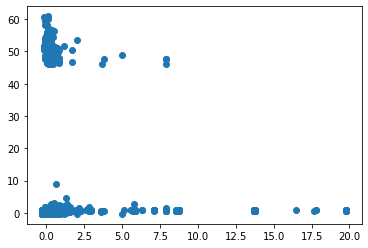

In [68]:
model.fit(transformed_training, training_y_scaled)
pred_y = model.predict(transformed_test)
plt.scatter(pred_y, test_y_scaled)
plt.show()